# ⏰🔔 4주차 미션 내용 🔔⏰

안녕하세요, **부스터 여러분들**!  
4주차 강의는 잘 들으셨나요?

## 📚 학습 내용
학습한 내용을 토대로 다음의 미션을 진행해 주세요.

## 📝 미션 내용
미션 내용을 팀원들과 함께 풀이해주세요!  
*(적극적인 토론이 필요합니다!)*

## 🚀 제출 정보
📢 **매주 화요일 23:59**까지 리드부스터가 제출해주세요!

**모두들 화이팅입니다!** 🎉


# 📌 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다.

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!
[참고] 한글폰트 설정 : https://github.com/ychoi-kr/koreanize-matplotlib

In [2]:
!pip install koreanize-matplotlib #koreanize_matplotlib 설치해야 오류안납니다.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

## ☄️ <데이터 특이사항>

- 오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!
- [원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

🔽 데이터 현황을 확인하고 싶다면? 아래 코드를 통해 확인해보세요.

In [4]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

## 📝 데이터 전처리 및 기술통계 요청

### 📌 Q1. 데이터 전처리 요청사항

1. **시점 컬럼에서 연도와 분기에 대한 파생변수 생성**
2. 데이터 컬럼의 단위를 "백만"으로 변경
3. 전처리한 '백만', '연도', '분기' 컬럼이 수치형 데이터인지 확인

### 📈 기대되는 describe() 결과

*참고: 소숫점 자리수가 다르게 표시되더라도 값이 동일하면 문제없음*


### 🤓 해당 기술통계로 알 수 있는 정보
- mean: 각 컬럼의 평균값
- std: 각 컬럼의 표준편차
- min: 각 컬럼의 최소값
- 25%: 각 컬럼의 1사분위값
- 50%: 각 컬럼의 중앙값 (중위수)
- 75%: 각 컬럼의 3사분위값
- max: 각 컬럼의 최대값

기술통계를 통해 데이터의 중심경향, 분산도 및 형태 등의 기본적인 통계적 특성을 파악할 수 있습니다.


🔽 출력 예시



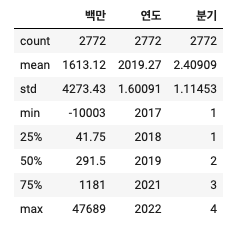

In [8]:
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [13]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

# "시점" 컬럼에서 연도와 분기 파생변수 생성
df['연도'] = df['시점'].str.split('.').str[0].astype(int)
df['분기'] = df['시점'].str.split('.').str[1].str[0].astype(int)

# "데이터" 컬럼의 값을 "백만" 단위로 변경
# df['데이터'] = df['데이터'] * 1e6

# 기술통계 구하기
desc = df[['데이터', '연도', '분기']].describe()

# 결과 출력 (소수점 두 자리까지만 출력)
pd.set_option('display.float_format', '{:.2f}'.format)
print(desc)


            데이터      연도      분기
count   2772.00 2772.00 2772.00
mean    1613.12 2019.27    2.41
std     4273.43    1.60    1.11
min   -10003.00 2017.00    1.00
25%       41.75 2018.00    1.00
50%      291.50 2019.00    2.00
75%     1181.00 2021.00    3.00
max    47689.00 2022.00    4.00


## 📝 데이터 분석 요청

### 📌 Q2. 국가(대륙)별 연도별 판매액 합계 분석

- **목적**: 국가(대륙)별 연도별 판매액의 합계를 분석하여 어느 지역에서 판매액이 많은지 파악
- **분석 도구**: `pivot_table` 사용

### 📊 기대되는 결과 및 시각화

1. 국가(대륙)별, 연도별 판매액 합계 테이블 생성
2. 결과를 바탕으로 한 시각화 (그래프 스타일 및 색상은 자유롭게 선택 가능)

🔽 출력 예시

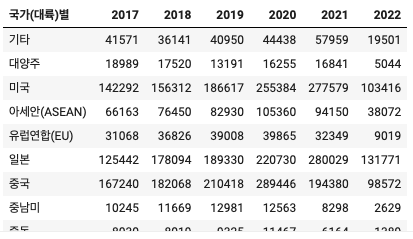

In [15]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

# "시점" 컬럼에서 연도 파생변수 생성
df['연도'] = df['시점'].str.split('.').str[0].astype(int)

# pivot_table을 사용하여 국가(대륙)별 연도별 판매액 합계 구하기
pivot_df = df.pivot_table(index='연도', columns='국가(대륙)별', values='데이터', aggfunc='sum')

# 결과 출력
print(pivot_df)

국가(대륙)별     기타    대양주      미국  아세안(ASEAN)  유럽연합(EU)      일본      중국    중남미  \
연도                                                                           
2017     41571  18989  142292       66163     31068  125442  167240  10245   
2018     36141  17520  156312       76450     36826  178094  182068  11669   
2019     40950  13191  186617       82930     39008  189330  210418  12981   
2020     44438  16255  255384      105360     39865  220730  289446  12563   
2021     57959  16841  277579       94150     32349  280029  194380   8298   
2022     19501   5044  103416       38072      9019  131771   98572   2629   

국가(대륙)별     중동  
연도              
2017      8030  
2018      8019  
2019      9325  
2020     11467  
2021      6164  
2022      1389  


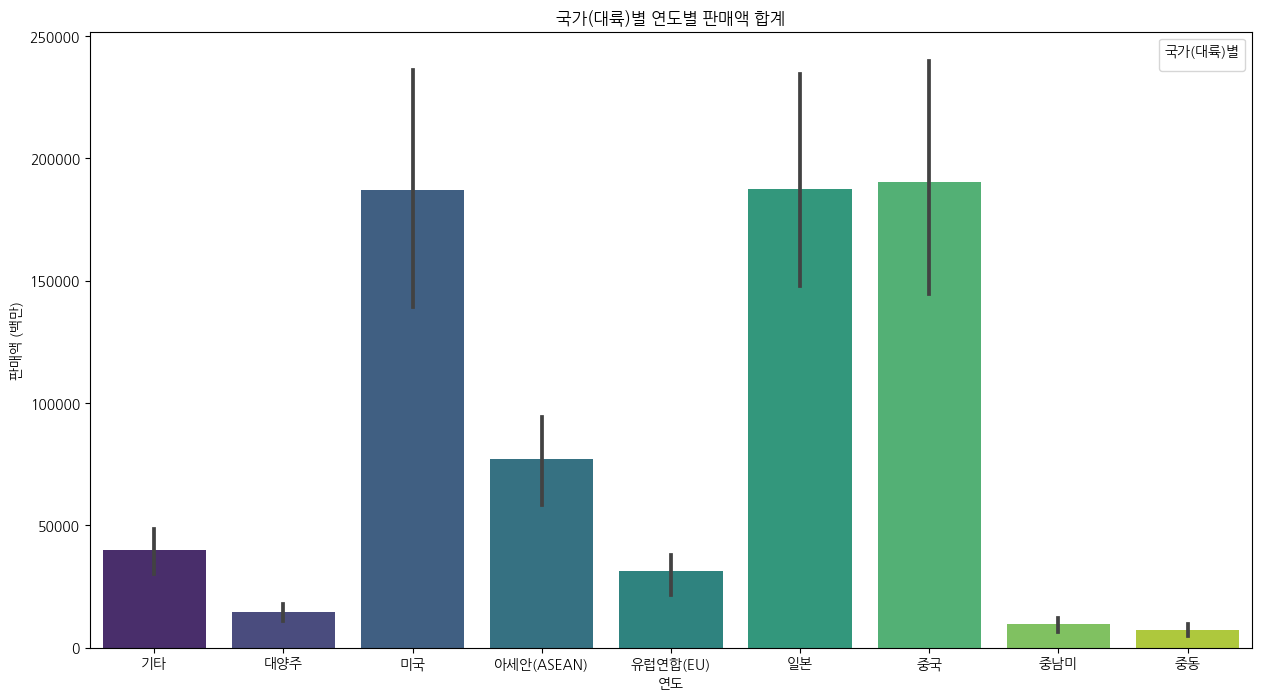

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

# "시점" 컬럼에서 연도와 분기 파생변수 생성
df['연도'] = df['시점'].str.split('.').str[0].astype(int)

# pivot_table을 사용하여 국가(대륙)별 연도별 판매액 합계 구하기
pivot_df = df.pivot_table(index='국가(대륙)별', columns='연도', values='데이터', aggfunc='sum')

# 결과 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=pivot_df.T, palette="viridis")
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.ylabel('판매액 (백만)')
plt.xlabel('연도')
plt.legend(title='국가(대륙)별', loc='upper right')
plt.show()

## 📝 데이터 분석 요청

### 📌 Q3. 2020년 온라인 해외판매 상품군 지역별 합계 분석

- **배경**: 2020년은 전국민에게 힘든 시기였으며, 해외 온라인 판매가 크게 증가한 시기입니다.
- **목적**: 2020년 해외 지역별 온라인 판매 합계를 분석하여 어느 지역에 판매가 많이 이루어졌는지 파악
- **분석 도구**: `groupby()`, `unstack()` 사용

### 📊 기대되는 결과 및 시각화

1. 2020년 지역별 온라인 해외판매 상품군 합계 테이블 생성
2. 분석 결과를 바탕으로 한 시각화 및 인사이트 도출 (그래프 스타일 및 색상은 자유롭게 선택 가능)


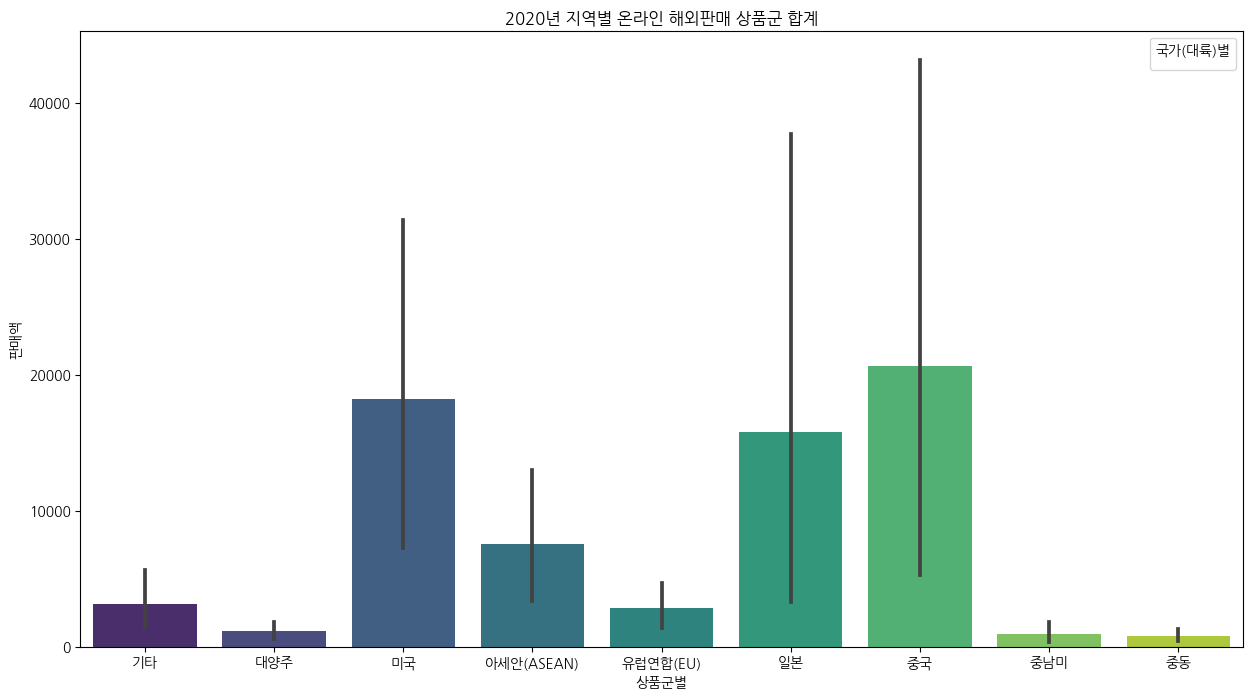

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

# "시점" 컬럼에서 연도 파생변수 생성
df['연도'] = df['시점'].str.split('.').str[0].astype(int)

# 2020년 데이터만 필터링
df_2020 = df[df['연도'] == 2020]

# groupby와 unstack을 사용하여 지역별 합계 구하기
result = df_2020.groupby(['국가(대륙)별', '상품군별'])['데이터'].sum().unstack()

# 결과 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=result.T, palette="viridis")
plt.title('2020년 지역별 온라인 해외판매 상품군 합계')
plt.ylabel('판매액')
plt.xlabel('상품군별')
plt.legend(title='국가(대륙)별', loc='upper right')
plt.show()

# 인사이트:
# - 그래프를 통해 2020년 각 지역별로 어떤 상품군이 많이 팔렸는지 확인할 수 있습니다.
# - 특정 지역에서는 어떤 상품군이 인기가 있었는지, 어떤 지역에서는 어떤 상품군의 판매가 적었는지 등의 정보를 파악할 수 있습니다.


#### 📊 2020년 온라인 해외판매 상품군 인사이트
🌟 전체 지역 분석: 그래프를 통해 2020년 각 지역별로 어떤 상품군이 많이 팔렸는지 확인할 수 있습니다.

🌍 지역별 특징: 특정 지역에서는 어떤 상품군이 인기가 있었는지, 반면 다른 지역에서는 어떤 상품군의 판매가 적었는지 등의 정보를 파악할 수 있습니다.

### 📝 데이터 시각화 요청

#### 📌 Q4. 주요 판매 국가 및 상품군에 대한 2021년까지의 연도별 온라인 직접 판매액 합계 시각화

- **배경**: 온라인 직접 판매액이 높은 국가와 상품군에 대한 연도별 판매액 추이를 파악하고자 합니다.
- **주요 판매 국가**: "미국", "중국", "일본"
- **주요 판매 상품군**: "의류 및 패션 관련상품", "화장품", "음반·비디오·악기"

#### 📊 기대되는 시각화

1. 선택된 국가 및 상품군에 대해 2021년까지의 연도별 판매액 합계를 표시한 그래프

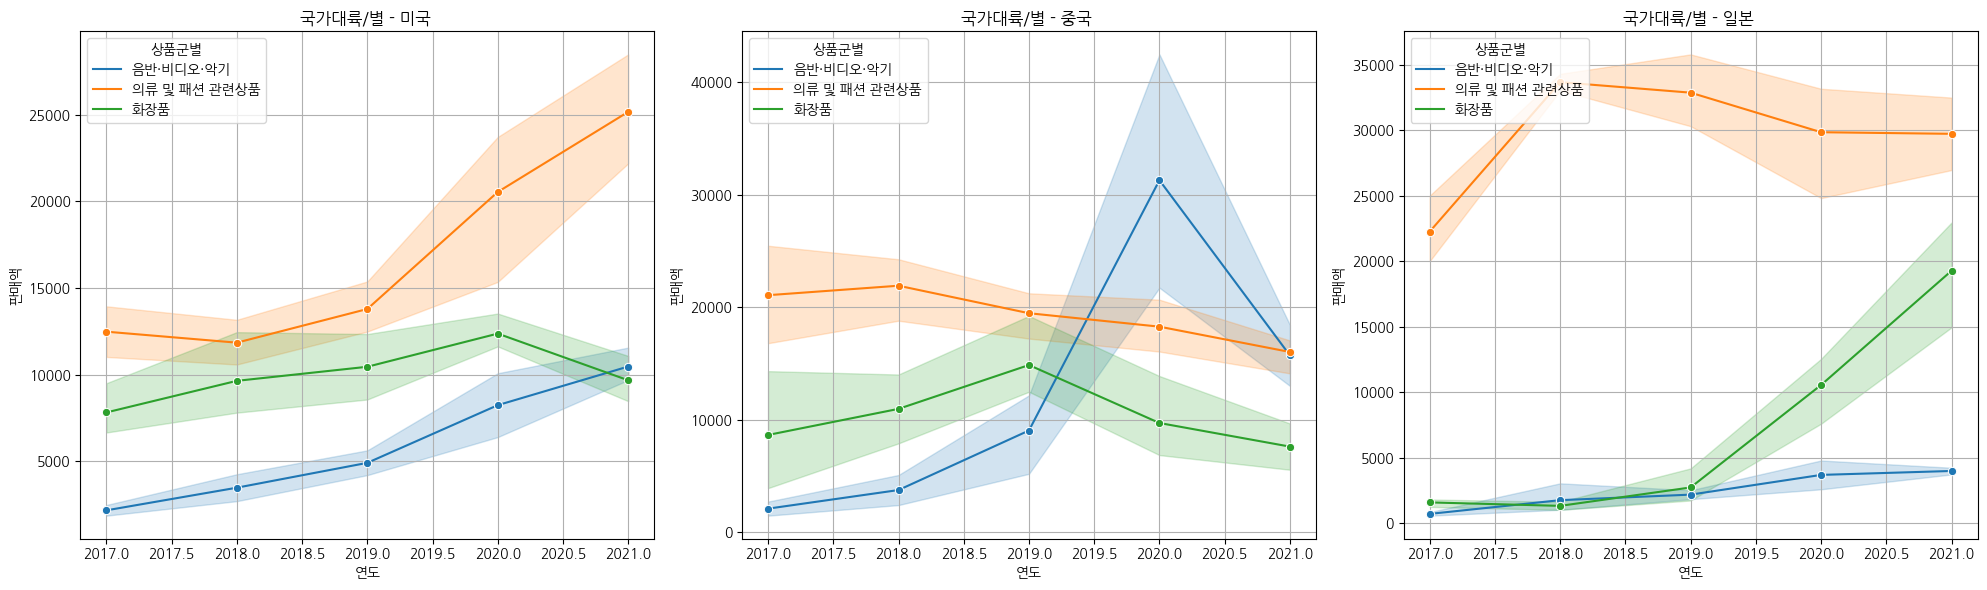

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

# "시점" 컬럼에서 연도 파생변수 생성
df['연도'] = df['시점'].str.split('.').str[0].astype(int)

# 주요 판매 국가와 상품군 필터링
countries = ["미국", "중국", "일본"]
products = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

filtered_df = df[(df['국가(대륙)별'].isin(countries)) &
                 (df['상품군별'].isin(products)) &
                 (df['연도'] <= 2021)]

# 각 국가/대륙별로 그래프를 나누어 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for idx, country in enumerate(countries):
    sns.lineplot(data=filtered_df[filtered_df['국가(대륙)별'] == country],
                 x='연도', y='데이터', hue='상품군별', ax=axes[idx], marker='o')
    axes[idx].set_title(f'국가대륙/별 - {country} ')
    axes[idx].set_ylabel('판매액')
    axes[idx].set_xlabel('연도')
    axes[idx].legend(title='상품군별', loc='upper left')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


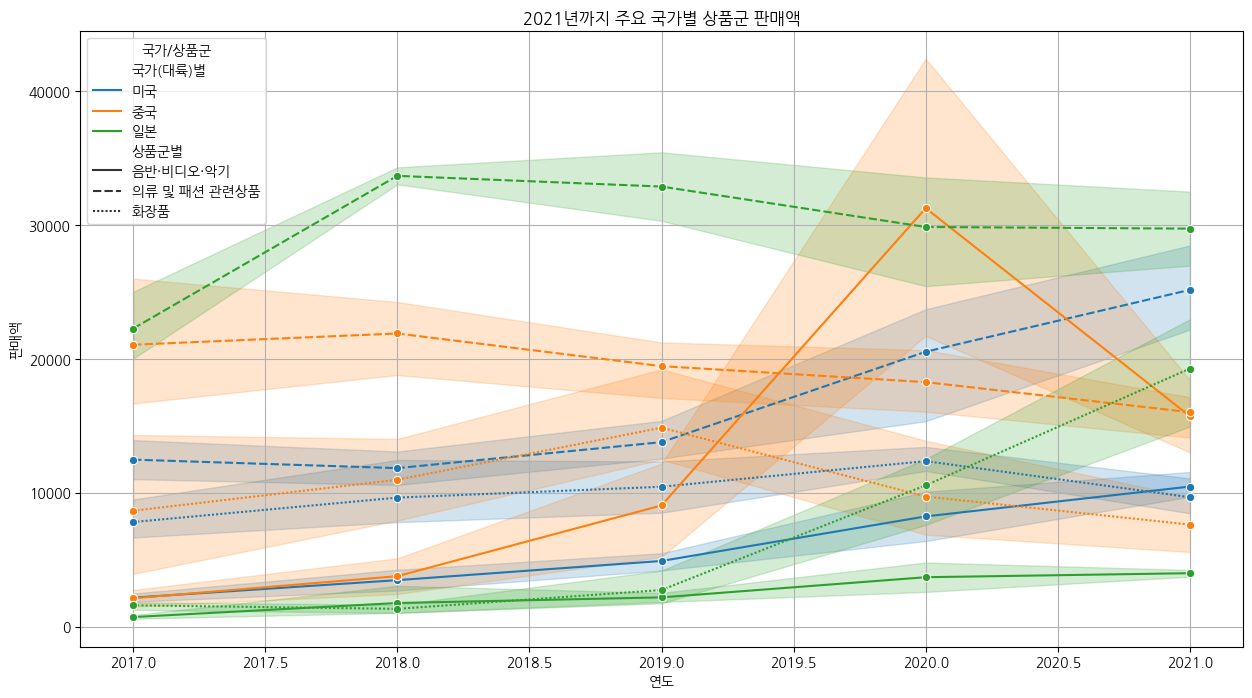

In [17]:
# 주요 판매 국가와 상품군 필터링
countries = ["미국", "중국", "일본"]
products = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

filtered_df = df[(df['국가(대륙)별'].isin(countries)) &
                 (df['상품군별'].isin(products)) &
                 (df['연도'] <= 2021)]

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(data=filtered_df, x='연도', y='데이터', hue='국가(대륙)별', style='상품군별', marker='o')
plt.title('2021년까지 주요 국가별 상품군 판매액')
plt.ylabel('판매액')
plt.xlabel('연도')
plt.legend(title='국가/상품군', loc='upper left')
plt.grid(True)
plt.show()

## 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [ ]:
# 마지막주차 화이팅!